In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
#считаем исходные данные
data = pd.read_csv('input/train.csv')

In [3]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [4]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


In [5]:
train.shape

(7000, 20)

In [6]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6252,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,B,B,25,5487,3,NaN,0,4,B,181530.459031
4684,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,B,16,4048,3,NaN,1,3,B,260456.004692
1731,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640
4742,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,66883.280318
4521,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,114086.065201


In [7]:
valid.shape

(3000, 20)

# Анализ и предобработка исходных данных

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#Алгоритм обработки (подготовки) данных в общем виде:
#В поле HouseYear найдем и исправим аномальные данные
#Поле Healthcare_1 использовать в нашей модели не будем
#Поля Ecology_2, Ecology_3 и Shops_2 переведем в категориальные
#Добавим столбец mean_price со средней ценой 

## Поле HouseYear

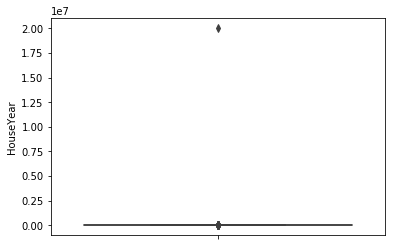

In [10]:
#Визуализируем данные о HouseYear
sns.boxplot(train['HouseYear'], orient='v')

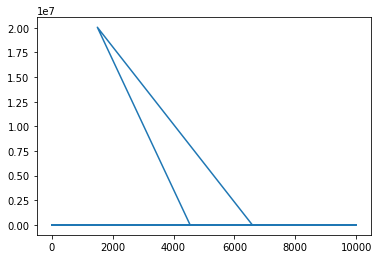

In [11]:
#Убедиться визуально, что в HouseYear присутствуют аномальные значения
plt.plot(train['HouseYear'])

In [12]:
#Найдем средний год постройки дома
mean_year = np.round(train.loc[(train['HouseYear'] <= 2020) & (train['HouseYear'] > 1900), 'HouseYear'].mean())
mean_year

1985.0

In [13]:
#Очистим данные от аномалий
def clean_year(df, mean_year=mean_year):
    df.loc[(df['HouseYear'] > 2020) | (df['HouseYear'] < 1900), 'HouseYear'] = mean_year
    return df

In [14]:
train=clean_year(train)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015.0,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977.0,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986.0,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017.0,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984.0,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


## Поле Price

In [15]:
train.groupby('DistrictId', as_index=False)[['Price']].mean().sort_values('Price', ascending=False)

,DistrictId,Price
189,190,516137.070651
198,202,502085.860162
194,195,482791.138606
180,181,477217.801361
181,182,471000.007453
137,137,435683.481400
195,199,432546.129741
174,175,429200.112196
200,208,428928.889005
65,65,423841.968912


In [16]:
#Установим параметр шума
noise_const = 15000

In [17]:
#Убедимся, что распределение шума близко к нормальному закону
noise = noise_const * np.random.randn(train.shape[0])

(array([  1.,   3.,   8.,   5.,  11.,  17.,  29.,  49.,  46.,  71., 100.,
        133., 151., 208., 219., 283., 314., 373., 398., 436., 465., 449.,
        429., 391., 391., 350., 313., 274., 222., 197., 184., 124., 101.,
         67.,  58.,  47.,  31.,  18.,  12.,   8.,   3.,   8.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-50673.03229425, -48322.33292042, -45971.6335466 , -43620.93417277,
        -41270.23479894, -38919.53542512, -36568.83605129, -34218.13667747,
        -31867.43730364, -29516.73792981, -27166.03855599, -24815.33918216,
        -22464.63980834, -20113.94043451, -17763.24106068, -15412.54168686,
        -13061.84231303, -10711.14293921,  -8360.44356538,  -6009.74419155,
         -3659.04481773,  -1308.3454439 ,   1042.35392992,   3393.05330375,
          5743.75267758,   8094.4520514 ,  10445.15142523,  12795.85079906,
         15146.55017288,  17497.24954671,  19847.94892053,  22198.64829436,
         24549.34766819,  26900.04704201,  29250.7

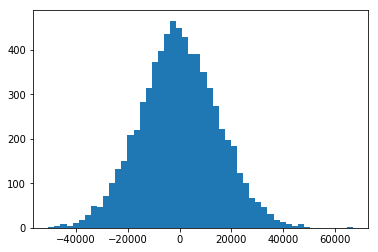

In [18]:
plt.hist(noise, bins=50)

In [19]:
train.shape[0]

7000

In [20]:
np.random.seed(42)

In [21]:
train['Price_n'] = train['Price'] + noise_const * np.random.randn(train.shape[0]) * (train['Rooms'] + 1)

In [22]:
train.loc[:, ['Price', 'Price_n']].head(10)

,Price,Price_n
9069,88504.384965,103405.809556
2603,207007.956663,198712.098592
7738,182126.280899,201556.937042
1579,524365.550705,615747.342090
5058,322048.433990,307999.231507
5753,282877.332154,268829.114737
3548,358129.914474,452882.683405
409,175973.694767,210508.257579
4097,240019.792399,218893.445032
6461,468039.075500,500592.678116


In [23]:
mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price'})
mean_price.head()

,DistrictId,Rooms,mean_price
0,0,1.0,125675.611519
1,0,2.0,180697.298932
2,0,3.0,268640.126763
3,1,1.0,147396.671134
4,1,2.0,195296.522967


In [24]:
mean_price2 = train.groupby('Rooms', as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price2'})
mean_price2

,Rooms,mean_price2
0,0.0,184897.022430
1,1.0,159777.943156
2,2.0,213862.735077
3,3.0,293565.372010
4,4.0,384741.955837
5,5.0,405924.621906
6,6.0,51901.498926
7,10.0,200460.018581
8,19.0,488426.896938


In [25]:
mean_price_all = train['Price_n'].mean()
mean_price_all

214397.0825236982

In [26]:
#Создадим поле mean_price
def add_mean_price(df, mean_price=mean_price, mean_price2=mean_price2):
    global mean_price_all
    df = pd.merge(df, mean_price2, on='Rooms', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
    df = df.drop('mean_price2', axis=1)
    return df

In [27]:
train = add_mean_price(train)

In [28]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_n,mean_price
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015.0,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,103405.809556,101527.520988
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977.0,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,198712.098592,183792.412835
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986.0,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,201556.937042,176782.540583
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017.0,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,615747.342090,392708.354017
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984.0,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,307999.231507,267043.942055


## Преобразуем некоторые поля в категориальные

In [29]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [30]:
train['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [31]:
train['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [32]:
def convert_to_category(df):
    df['Ecology_2'] = df['Ecology_2'].astype('category')
    df['Ecology_3'] = df['Ecology_3'].astype('category')
    df['Shops_2'] = df['Shops_2'].astype('category')
    df = pd.get_dummies(df)
    return df

In [33]:
train = convert_to_category(train)
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Price_n,mean_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015.0,0.075779,6,1437,3,NaN,0,2,88504.384965,103405.809556,101527.520988,0,1,0,1,0,1
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977.0,0.014073,2,475,0,NaN,0,0,207007.956663,198712.098592,183792.412835,0,1,0,1,0,1
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986.0,0.100456,43,7227,0,NaN,1,6,182126.280899,201556.937042,176782.540583,0,1,0,1,1,0
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017.0,0.041125,46,9515,5,NaN,1,10,524365.550705,615747.342090,392708.354017,0,1,0,1,0,1
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984.0,0.298205,16,4048,3,NaN,1,3,322048.433990,307999.231507,267043.942055,0,1,0,1,0,1
5,3766,62,3.0,127.417560,NaN,0.0,9,0.0,1977.0,0.072158,2,629,1,NaN,0,0,282877.332154,268829.114737,247163.255296,0,1,0,1,1,0
6,11463,129,3.0,72.953912,39.478723,9.0,16,15.0,1991.0,0.460556,20,4386,14,NaN,1,5,358129.914474,452882.683405,324706.712048,0,1,0,1,0,1
7,15037,11,2.0,46.430852,31.678912,5.0,2,5.0,1960.0,0.038693,28,6533,1,1015.0,2,5,175973.694767,210508.257579,208449.140884,0,1,0,1,0,1
8,4389,39,2.0,54.326263,34.394391,9.0,3,12.0,1974.0,0.428826,25,5011,8,730.0,0,2,240019.792399,218893.445032,175938.251765,0,1,0,1,0,1
9,15829,104,3.0,75.777599,45.381156,9.0,2,9.0,1985.0,0.327018,12,2270,23,2500.0,1,0,468039.075500,500592.678116,411923.711092,0,1,0,1,0,1


# Model

In [34]:
#Построим модель. Воспользуемся RandomForestRegressor
#Подключим библиотеки
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2

In [35]:
#Обработаем валидационный датасет
valid = clean_year(valid)
valid = add_mean_price(valid)
valid = convert_to_category(valid)

In [36]:
#Создадим список признаков
feats = ['Shops_1', 'Ecology_2_A', 'Rooms', 'Square', 'HouseYear', 'KitchenSquare', 'HouseFloor', 'Ecology_1', 'Social_3', 'mean_price']

In [37]:
#Оценим модель с заданными параметрами
def evaluate_model(model, train, valid, metric, feats, target, max_depth):
    dtr = model(max_depth=max_depth, n_estimators=100, random_state=42)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    return metric_train, metric_valid

In [38]:
#Зафиксируем результаты обучения
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [39]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=20, model=RFR)

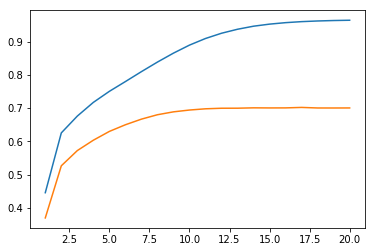

In [40]:
#Визуализируем процесс обучения на графике
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [41]:
np.max(metric_valid_arr)

0.7020433565475931

In [42]:
metric_valid_arr

[0.3698266599357789,
 0.526530129584556,
 0.5722863927270414,
 0.6034510689091095,
 0.6299096454985402,
 0.6499042287001551,
 0.6667769172333073,
 0.680039931115116,
 0.6887186757686516,
 0.6941794645215258,
 0.6978727798534631,
 0.6995799450312251,
 0.6996801729585453,
 0.7007695737492369,
 0.7004943588107972,
 0.7006236703803372,
 0.7020433565475931,
 0.7003636800123378,
 0.70031847594403,
 0.7004538308147812]

In [43]:
#Установим модели оптимальные параметры
model = RFR(max_depth=17, random_state=42)

In [44]:
#Обучим модель
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# Test

In [45]:
#Считаем тестовый датасет
test = pd.read_csv('input/test.csv')

In [46]:
#Обработаем тестовый датасет
test = clean_year(test)
test = add_mean_price(test)
test = convert_to_category(test)

In [47]:
#Рассчитаем Price для тестового датасета
test['Price'] = model.predict(test.loc[:, feats])

In [48]:
#Сохраним результат в файл
test.loc[:, ['Id', 'Price']].to_csv('TSataev_predictions.csv', index=None)